# Forecasting with MCForecast

In this activity you will use the provided `MCForecastTools.py` module to forecast a portfolio's returns for one years worth of stock data from Home Depot and Disney.
  - You will retrieve data using the Quandl API.
  - You will then concatenate the dataframes for use with `MCSimulation`.
  - Then you will use `calc_cumulative_return` to get the cumulative return for the year.
  - After that you will plot the simulations, examine the distribution and review the summary statistics for the simulation.

>**Hint**: The most authoritative documentation you can find is the source code itself. You will need to read through the `MCForecastTools.py` file to get an idea of how the module is working.

## 1. Import Modules

In [28]:
# Import modules.
import os
import pandas as pd
import hvplot.pandas
import numpy.random as rnd
from dotenv import load_dotenv
import requests
from utils.MCForecastTools import MCSimulation

!nvidia-smi

Wed May 18 03:41:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.68.01    Driver Version: 512.59       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  Off |
| 55%   53C    P8    28W / 450W |   1587MiB / 24564MiB |     34%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Load Environment Variables

In [29]:
# Load .env environment variables into the notebook
load_dotenv()

# Get the API key from the environment variable and store it as a python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")
display(type(quandl_api_key))

str

## 3. Get Data from Quandl
  - Use the provided tickers and urls

In [30]:
# Ticker symbols
symbol_1 = "HD"
symbol_2 = "DIS"

In [31]:
# Urls for Quandl
url_1 = f"https://www.quandl.com/api/v3/datasets/WIKI/{symbol_1}.json?&api_key={quandl_api_key}"
url_2 = f"https://www.quandl.com/api/v3/datasets/WIKI/{symbol_2}.json?&api_key={quandl_api_key}"

In [32]:
# Home Depot response
response_1 = requests.get(url_1).json()

In [33]:
# Disney response
response_2 = requests.get(url_2).json()

## 4. Create a `pandas` `DataFrame`

- Using the response json objects, get a list of the column names and create dataframes for each ticker.
- Convert each dataframe's `Date` field to a `datetime` object and set `Date` as the index.
  - Use `to_datetime` to convert a string into a datetime object.
  - Use the `infer_datetime_format` parameter.
- Filter each dataframe to only keep the `"Open", "High", "Low", "Close", "Volume"` columns.
- The columns will then need to be renamed using all lowercase letters to work with `MCForecastTools`.
- Create a dictionary to hold the Home Depot and Disney dataframes similar to the following:
  ```
  { "ticker_name": ticker_df , .... }
  ```
  `MCForecastTools` requires that the dataframe be multi-indexed.
- Use the dictionary and `concat` from pandas to concatenate the dataframes and return a multi-indexed dataframe.
- Use the dictionary's `.value()` method for the data parameter into `concat`.
- Set `axis = 1`.
- Use the dictionary's `.keys()` method for the `keys` parameter in `concat`.

In [34]:
# Get list of column names
column_names = response_1["dataset"]["column_names"]

In [35]:
# Create a dataframe from Home Depot the response.
symbol_1_df = pd.DataFrame(response_1["dataset"]["data"], columns=column_names)

In [36]:
# Convert `Date` to datetime
symbol_1_df["Date"] = pd.to_datetime(symbol_1_df["Date"], infer_datetime_format=True)

In [37]:
# Set index
symbol_1_df = symbol_1_df.set_index("Date")

In [38]:
# Print Home Depot dataframe
symbol_1_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,177.38,178.73,173.600,174.68,4640376.0,0.0,1.0,177.380000,178.730000,173.600000,174.680000,4.640376e+06
2018-03-26,174.11,176.80,173.515,176.38,7123755.0,0.0,1.0,174.110000,176.800000,173.515000,176.380000,7.123755e+06
2018-03-23,176.24,177.56,171.560,171.80,5851950.0,0.0,1.0,176.240000,177.560000,171.560000,171.800000,5.851950e+06
2018-03-22,177.42,178.56,175.080,175.29,5049280.0,0.0,1.0,177.420000,178.560000,175.080000,175.290000,5.049280e+06
2018-03-21,178.35,180.14,177.680,178.02,3472629.0,0.0,1.0,178.350000,180.140000,177.680000,178.020000,3.472629e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1981-09-28,10.25,10.25,10.250,10.25,16957.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.794525e+06
1981-09-25,10.25,10.25,10.250,10.25,21382.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.306630e+06
1981-09-24,10.25,10.25,10.250,10.25,14824.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.065639e+06


In [39]:
# Create a dataframe from the Disney response.
symbol_2_df = pd.DataFrame(response_2["dataset"]["data"], columns=column_names)

In [40]:
# Convert `Date` to datetime
symbol_2_df["Date"] = pd.to_datetime(symbol_2_df["Date"], infer_datetime_format=True)


In [41]:
# Set index
symbol_2_df = symbol_2_df.set_index("Date")

In [42]:
# Print Disney dataframe
symbol_2_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,100.88,101.18,98.8900,99.36,7131436.0,0.0,1.0,100.880000,101.180000,98.890000,99.360000,7131436.00
2018-03-26,99.86,100.78,99.0782,100.65,7262326.0,0.0,1.0,99.860000,100.780000,99.078200,100.650000,7262326.00
2018-03-23,100.85,101.11,98.4500,98.54,7380554.0,0.0,1.0,100.850000,101.110000,98.450000,98.540000,7380554.00
2018-03-22,101.29,101.64,100.4100,100.60,8648198.0,0.0,1.0,101.290000,101.640000,100.410000,100.600000,8648198.00
2018-03-21,101.50,102.94,101.4200,101.82,5917934.0,0.0,1.0,101.500000,102.940000,101.420000,101.820000,5917934.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1962-01-08,37.88,38.38,37.0000,37.75,3197.0,0.0,1.0,0.143648,0.145544,0.140311,0.143155,623031.36
1962-01-05,37.75,38.00,37.6300,37.88,2397.0,0.0,1.0,0.143155,0.144103,0.142700,0.143648,467127.36
1962-01-04,37.75,37.88,37.5000,37.75,2397.0,0.0,1.0,0.143155,0.143648,0.142207,0.143155,467127.36


In [43]:
# Take only the "Open", "High", "Low", "Close", "Volume" columns for each dataframe.
symbol_1_df = symbol_1_df[["Open", "High", "Low", "Close", "Volume"]]
symbol_2_df = symbol_2_df[["Open", "High", "Low", "Close", "Volume"]]

In [44]:
# MCSimulation is case sensitive to column names.
# Rename the columns to "open", "high", "low", "close", "volume"
column_names = ["open", "high", "low", "close", "volume"]
symbol_1_df.columns = column_names
symbol_2_df.columns = column_names

In [45]:
# Create a dictionary of the two dataframes
to_merge_dict = {symbol_1: symbol_1_df, symbol_2: symbol_2_df}

In [46]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())


In [47]:
merged_df


HD                                         DIS          \
              open    high      low   close     volume    open    high   
Date                                                                     
1962-01-02     NaN     NaN      NaN     NaN        NaN   37.25   38.50   
1962-01-03     NaN     NaN      NaN     NaN        NaN   37.25   37.88   
1962-01-04     NaN     NaN      NaN     NaN        NaN   37.75   37.88   
1962-01-05     NaN     NaN      NaN     NaN        NaN   37.75   38.00   
1962-01-08     NaN     NaN      NaN     NaN        NaN   37.88   38.38   
...            ...     ...      ...     ...        ...     ...     ...   
2018-03-21  178.35  180.14  177.680  178.02  3472629.0  101.50  102.94   
2018-03-22  177.42  178.56  175.080  175.29  5049280.0  101.29  101.64   
2018-03-23  176.24  177.56  171.560  171.80  5851950.0  100.85  101.11   
2018-03-26  174.11  176.80  173.515  176.38  7123755.0   99.86  100.78   
2018-03-27  177.38  178.73  173.600  174.68  4640376.0  100.88  101.18   

                                         
                 low   close     volume  
Date                                     
1962-01-02   37.2500   37.25     2098.0  
1962-01-03   37.2500   37.75     1998.0  
1962-01-04   37.5000   37.75     2397.0  
1962-01-05   37.6300   37.88     2397.0  
1962-01-08   37.0000   37.75     3197.0  
...              ...     ...        ...  
2018-03-21  101.4200  101.82  5917934.0  
2018-03-22  100.4100  100.60  8648198.0  
2018-03-23   98.4500   98.54  7380554.0  
2018-03-26   99.0782  100.65  7262326.0  
2018-03-27   98.8900   99.36  7131436.0  

[14155 rows x 10 columns]

## 5. Forecast with `MCSimulation`
- Create an instance of `MCSimulation` with the following parameter values:
  - `weights == [0.25,0.75]`
  - `num_simulations == 500`
  - `num_trading_days == 252`
- Call the `calc_cumulative_return` method to run the number of simulations.
- Call the `plot_simulation` method to plot the simulated returns.
- Call `plot_distribution` to plot a histogram of the underlying distribution.
- Call `summarize_cumulative_return` to display summary statistics for the simulated distribution.

In [48]:
# Create a simulation object
one_year_simulation = MCSimulation(
    portfolio_data=merged_df,
    weights=[0.25, 0.75],
    num_simulation=500,
    num_trading_days=252,
)


In [49]:
# Review the simulation input data
display(one_year_simulation.portfolio_data.head())
display(one_year_simulation.portfolio_data.tail())

HD                                       DIS                \
           open high low close volume daily_return   open   high    low   
Date                                                                      
1962-01-02  NaN  NaN NaN   NaN    NaN          NaN  37.25  38.50  37.25   
1962-01-03  NaN  NaN NaN   NaN    NaN          NaN  37.25  37.88  37.25   
1962-01-04  NaN  NaN NaN   NaN    NaN          NaN  37.75  37.88  37.50   
1962-01-05  NaN  NaN NaN   NaN    NaN          NaN  37.75  38.00  37.63   
1962-01-08  NaN  NaN NaN   NaN    NaN          NaN  37.88  38.38  37.00   

                                        
            close  volume daily_return  
Date                                    
1962-01-02  37.25  2098.0          NaN  
1962-01-03  37.75  1998.0     0.013423  
1962-01-04  37.75  2397.0     0.000000  
1962-01-05  37.88  2397.0     0.003444  
1962-01-08  37.75  3197.0    -0.003432

HD                                                      DIS  \
              open    high      low   close     volume daily_return    open   
Date                                                                          
2018-03-21  178.35  180.14  177.680  178.02  3472629.0    -0.000786  101.50   
2018-03-22  177.42  178.56  175.080  175.29  5049280.0    -0.015335  101.29   
2018-03-23  176.24  177.56  171.560  171.80  5851950.0    -0.019910  100.85   
2018-03-26  174.11  176.80  173.515  176.38  7123755.0     0.026659   99.86   
2018-03-27  177.38  178.73  173.600  174.68  4640376.0    -0.009638  100.88   

                                                              
              high       low   close     volume daily_return  
Date                                                          
2018-03-21  102.94  101.4200  101.82  5917934.0     0.004637  
2018-03-22  101.64  100.4100  100.60  8648198.0    -0.011982  
2018-03-23  101.11   98.4500   98.54  7380554.0    -0.020477  
2018-03-26  100.78   99.0782  100.65  7262326.0     0.021413  
2018-03-27  101.18   98.8900   99.36  7131436.0    -0.012817

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Run the Monte Carlo simulation to forecast the cumulative return
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005245,0.969509,1.005280,0.978506,0.984405,1.005192,0.991603,0.968222,1.002554,1.037484,...,1.030068,1.000970,0.982739,1.016026,0.982082,0.990816,0.993265,1.016963,0.962170,1.015941
2,0.996972,1.008453,1.015463,0.986126,0.956952,0.975520,1.005113,1.005377,1.002630,1.032699,...,1.052835,1.008315,0.992648,0.990332,0.940895,0.976200,0.972511,1.011364,0.940961,1.023868
3,0.990997,0.997210,1.045782,1.002759,0.960644,1.006611,1.020646,1.018801,0.987554,1.039056,...,1.039428,1.012887,1.018256,0.995380,0.930113,1.006733,0.981375,1.031396,0.902693,1.036309
4,0.963263,0.989863,1.024609,1.004378,0.923707,1.014625,1.014332,1.029571,0.979694,1.011427,...,1.028137,1.024402,1.015695,0.999674,0.905427,1.046036,0.991654,1.018494,0.914145,1.025839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.321266,1.322821,0.591502,1.200049,0.974305,1.942660,1.168773,1.141933,0.971962,1.238914,...,0.827723,1.824318,0.903016,1.412636,0.907936,0.948759,0.777273,1.120754,1.665865,1.114732
249,1.360403,1.317909,0.582984,1.161643,0.966592,1.962128,1.133183,1.140290,0.970329,1.242141,...,0.838704,1.819304,0.899960,1.411925,0.936021,0.954249,0.799025,1.136878,1.625070,1.131658
250,1.345267,1.342920,0.579844,1.164073,0.997920,1.956540,1.128513,1.129719,0.968604,1.234259,...,0.847791,1.845380,0.876577,1.443516,0.917526,0.957774,0.790810,1.169635,1.587258,1.087367
251,1.321108,1.346175,0.584789,1.137151,1.005231,1.949607,1.115998,1.148665,0.939278,1.222647,...,0.837634,1.858165,0.857613,1.453612,0.903242,0.952191,0.787447,1.192960,1.519525,1.085491


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

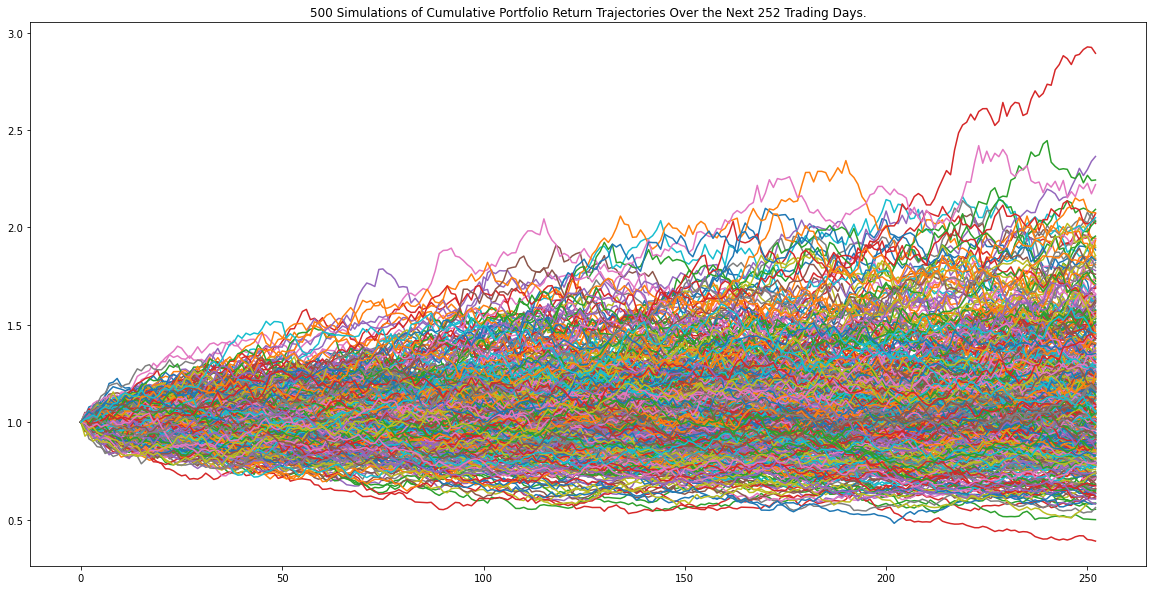

In [52]:
# Visualize the simulation by creating an
# overlay line plot
one_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

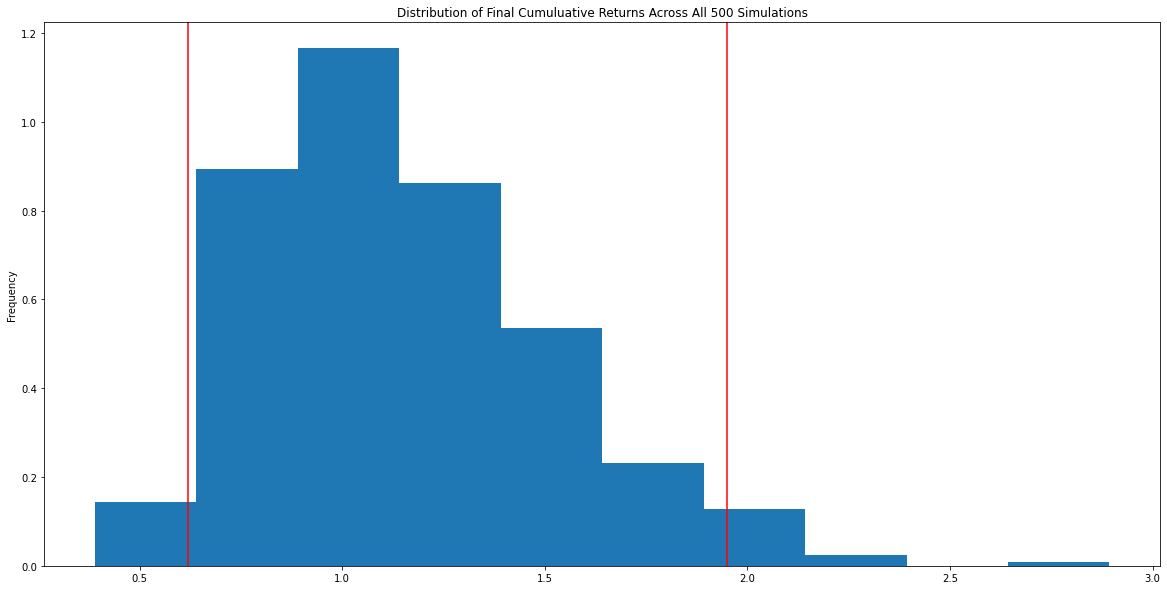

In [53]:
# Visualize the probability distribution of the simulation
# by plotting a histogram
one_year_simulation.plot_distribution()

In [54]:
# Generate summary statistics from the simulation results
# Save the results as a variable
one_year_simulation_statistics = one_year_simulation.summarize_cumulative_return()

# Review the summary statistics
print(one_year_simulation_statistics)


count           500.000000
mean              1.147796
std               0.357272
min               0.389837
25%               0.882300
50%               1.081462
75%               1.346616
max               2.893732
95% CI Lower      0.620412
95% CI Upper      1.950123
Name: 252, dtype: float64
